### 风格，场景，行业
title
content

In [7]:
Industries = [ '互联网',
                '交通运输',
                '体育竞技',
                '党政机关',
                '医疗保健',
                '婚礼婚庆',
                '宠物行业',
                '房产建筑',
                # '房产行业',
                '教育行业',
                '旅游行业',
                '美容保养',
                '节日庆典',
                '运动健身',
                '金融投资',
                '餐饮行业']

In [2]:
import pymongo
import pandas as pd

In [3]:
client = pymongo.MongoClient('192.168.235.223',27017)
db  = client['nlp_db']
baidu_text = db['baidu_text']

In [4]:
baidu_text = db['baidu_text_scene']

In [5]:
texts = list(baidu_text.find())
contents = []
titles = []
keywords = []
sentences = []
counts = []
for text in texts:
    sentences.append(text["title"]+text["content"])
    # titles.append(text["title"])
    # contents.append(text["content"])
    keywords.append(text["keyword"])
    counts.append(1)
df = pd.DataFrame({"Label": keywords,
                    "Sentence": sentences,
                    "Count":counts})

In [6]:
df[0:10]

,Label,Sentence,Count
0,个人分享,晨会个人分享 - 百度文库2020年7月21日 - 晨会个人分享 (共17篇) 晨会分享主题...,1
1,个人分享,"个人分享怎么写3天前 - 个人工作总结精编分享 个人工作总结结尾大家 都知道,做事要有头有尾...",1
2,个人分享,"个人工作感悟分享_百度文库个人工作感悟分享 1 感悟 1 好的平台很重要 2 持续学习,广泛...",1
3,个人分享,"员工个人分享怎么写_百度知道最佳答案: 员工个人分享 跟大家聊一下我的工作经验,XX年2月2...",1
4,个人分享,个人分享_百度图片,1
5,个人分享,"个人分享 - IT技术宅致力于IT技术分享,关注于web前端技术和编程语言技术的学习研究,其...",1
6,个人分享,"个人分享生活如此多娇! 想给心情放个假,点击这里,周边美食,景点,一网打进!坐地铁,坐公交,...",1
7,个人分享,"个人工作分享文稿 - 简书2018年11月28日 - 大家好,我是市场专员,现在站在这里还是...",1
8,个人分享,"个人工作感悟分享_百度文库个人工作感悟分享 1 感悟 1 好的平台很重要 2 持续学习,广泛...",1
9,个人分享,"员工个人分享怎么写_百度知道最佳答案: 员工个人分享 跟大家聊一下我的工作经验,XX年2月2...",1


In [7]:
from sklearn import utils
df = utils.shuffle(df)
df[0:10]

,Label,Sentence,Count
15906,城市建设,"云南城市建设职业学院云南城市建设职业学院是经云南省人民政府批准、国家教育部备案,具有独立颁发...",1
35246,活动策划,天津活动策划公司-天津年会典礼-开业庆典-舞美演艺公关-天津礼仪...天津文化传媒是一家专业...,1
35302,活动策划,深圳活动策划公司新产品发布策划_深圳开业周年庆典晚会活动策划...【盛世繁花·文化_深圳活动...,1
35439,活动策划,活动计划_活动计划书范文2018年10月19日 - 活动计划为大家带来各种主题的活动计划书范...,1
27551,教育培训,【上海培训网|上海教育培训学校】- 上海赶集网赶集网上海教育培训频道是上海专业的教育培训信息...,1
45733,计划总结,公司半年度工作总结及计划 - 范文中心以下是本站为大家整理的关于办公室个人上半年工作总结及下...,1
2173,个人分享,个人技术分享 - Langzi - Never Setter 永不将就个人技术分享 致力于P...,1
1868,个人分享,个人分享-范大千-教育-高清完整正版视频在线观看-优酷,1
49815,颁奖典礼,《2018寻找最美医生颁奖典礼》_哔哩哔哩 (゜-゜)つロ 干杯~-bi...,1
8385,企业宣传,"企业宣传册模板_素材中国sccnn.com2018年7月27日 - 简约企业宣传册设计,企业...",1


In [8]:
train_len = df.shape[0]//4 *3
train_df = df[0:train_len]
test_df = df[train_len:]

In [9]:
train_df["CutSentence"] = train_df["Sentence"].apply(chinese_word_cut)
test_df["CutSentence"] = test_df["Sentence"].apply(chinese_word_cut)
train_df["CutSentence"].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.241 seconds.
Prefix dict has been built successfully.


15906    云南 城市 建设 职业 学院 云南 城市 建设 职业 学院 是 经 云南省人民政府 批准 、...
35246    天津 活动 策划 公司 - 天津 年会 典礼 - 开业庆典 - 舞美 演艺 公关 - 天津 ...
35302    深圳 活动 策划 公司 新 产品 发布 策划 _ 深圳 开业 周年 庆典 晚会 活动 策划 ...
35439    活动 计划 _ 活动 计划书 范文 2018 年 10 月 19 日   -   活动 计划...
27551    【 上海 培训网 | 上海 教育 培训 学校 】 -   上海 赶集网 赶集网 上海 教育 ...
Name: CutSentence, dtype: object

In [15]:
# df.groupby(by="Label").sum()

In [19]:
# 体育	5000
# 娱乐	5000
# 家居	5000
# 房产	5000
# 教育	5000
# 时尚	5000
# 时政	5000
# 游戏	5000
# 科技	5000
# 财经	5000

In [4]:
len(Industries)

15

In [1]:
train_lines = open("./data/cnews/cnews.train.txt","r").readlines()
# for line in lines:
#     print(line)

In [2]:
# lines[0]
test_lines = open("./data/cnews/cnews.test.txt","r").readlines()

In [3]:
def process_line(line):
    items = line.split("\t")
    label = items[0]
    sentence = items[1].strip("\n")
    return label, sentence

In [4]:
import pandas as pd
def generate_data(lines):
    labels = []
    sentences = []
    counts = []
    for line in lines:
        label, sentence = process_line(line)
        labels.append(label)
        sentences.append(sentence)
        counts.append(1)
    df = pd.DataFrame({"Label": labels,
                "Sentence": sentences,
                "Count":counts})
    return df 

In [5]:
train_df = generate_data(train_lines)
test_df = generate_data(test_lines)

In [10]:
train_df.groupby(by="Label").sum()

,Count
Label,
个人分享,1634
产品发布,1698
企业宣传,1721
企业年会,1617
医疗通用,1715
咨询服务,1739
城市建设,1737
培训招生,1722
婚庆爱情,1410


In [6]:
train_df["CutSentence"] = train_df["Sentence"].apply(chinese_word_cut)
train_df["CutSentence"].head()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.758 seconds.
Prefix dict has been built successfully.


0    马晓旭 意外 受伤 让 国奥 警惕   无奈 大雨 格外 青睐 殷家 军 记者 傅亚雨 沈阳...
1    商瑞华 首战 复仇 心切   中国 玫瑰 要 用 美国 方式 攻克 瑞典 多曼来 了 ， 瑞...
2    冠军 球队 迎新 欢乐 派对   黄旭获 大奖 张军 赢 下 PK 赛 新浪 体育讯 12 ...
3    辽足 签约 危机 引 注册 难关   高层 威逼利诱 合同 笑里藏刀 新浪 体育讯 2 月 ...
4    揭秘 谢亚龙 被 带走 ： 总局 电话 骗局   复制 南杨 轨迹 体坛周报 特约记者 张锐...
Name: CutSentence, dtype: object

In [9]:
test_df["CutSentence"] = test_df["Sentence"].apply(chinese_word_cut)

In [11]:
# df.groupby(by="Label").sum()
from sklearn.feature_extraction.text import  CountVectorizer
vect=CountVectorizer()  # 实例化
vect.fit_transform(train_df["CutSentence"])

<39948x23962 sparse matrix of type '<class 'numpy.int64'>'
	with 878699 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()  

In [13]:
from sklearn.pipeline import make_pipeline # 导入make_pipeline方法
pipe=make_pipeline(vect,nb)
pipe.steps #  查看pipeline的步骤（与pipeline相似）

[('countvectorizer', CountVectorizer()), ('multinomialnb', MultinomialNB())]

In [14]:
pipe.fit(train_df["CutSentence"], train_df["Label"])

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [15]:
# model_path = "/home/ginger/Projects/ND/data_analysis/industry_pipe.joblib"
model_path = "/home/ginger/Projects/ND/data_analysis/scene_pipe.joblib"

In [16]:
# 用joblib保存模型
import joblib
joblib.dump(pipe, model_path)

['/home/ginger/Projects/ND/data_analysis/scene_pipe.joblib']

In [9]:
import joblib
pp = joblib.load(model_path)
res = pp.predict(["我是 测试"])
res

array(['体育竞技'], dtype='<U4')

In [23]:
probs = pp.predict_proba(["马晓旭 意外 受伤 让 国奥 警惕   无奈 大雨 格外 青睐 殷家 军 记者 傅亚雨 沈阳马晓旭 意外 受伤 让 国奥 警惕   无奈 大雨 格外 青睐 殷家 军 记者 傅亚雨 沈阳","我 是 测试"])
probs

array([[1.18951186e-04, 1.11202227e-04, 4.78266555e-06, 8.77684917e-06,
        4.63519596e-08, 2.23394967e-05, 2.78270190e-04, 5.09226860e-07,
        5.82615115e-09, 1.33271530e-06, 5.00576597e-08, 1.94834408e-06,
        9.99349744e-01, 8.34664477e-05, 1.85748480e-05],
       [2.17142090e-02, 1.90955978e-01, 2.02626056e-01, 2.07682059e-02,
        1.85028871e-02, 1.70671938e-02, 1.07218748e-01, 1.86058291e-02,
        1.85778226e-02, 1.88595683e-02, 5.96885487e-02, 1.89294965e-02,
        9.06552568e-02, 1.80363180e-02, 1.77793882e-01]])

In [27]:
import numpy as np
np.argmax(probs[1])

2

In [17]:
pp.classes_

NameError: name 'pp' is not defined

In [8]:
res[0]

'运动健身'

In [18]:
y_pred = pipe.predict(test_df["CutSentence"]) 
# 对测试集进行预测（其中包括了转化以及预测）

In [19]:
# 模型对于测试集的准确率
from sklearn import  metrics
metrics.accuracy_score(test_df["Label"],y_pred)

0.9653127111645018

In [20]:
print(metrics.classification_report(test_df["Label"], y_pred))

precision    recall  f1-score   support

        个人分享       1.00      0.99      0.99       529
        产品发布       1.00      0.99      0.99       531
        企业宣传       0.99      0.99      0.99       604
        企业年会       0.99      0.87      0.92       530
        医疗通用       0.99      1.00      0.99       522
        咨询服务       1.00      0.97      0.98       583
        城市建设       0.99      0.99      0.99       582
        培训招生       0.97      0.99      0.98       568
        婚庆爱情       0.99      1.00      0.99       485
        岗位竞聘       0.99      0.99      0.99       497
        工作汇报       0.99      0.96      0.97       492
        总结计划       0.73      0.75      0.74       505
        教育培训       0.99      0.97      0.98       446
        毕业答辩       1.00      1.00      1.00       550
        求职简历       0.99      0.99      0.99       622
        活动策划       0.89      0.96      0.93       592
        环保宣传       0.99      0.98      0.98       404
        生日聚会       1.00      1.00      1.

In [21]:
from sklearn.metrics import confusion_matrix    # 生成混淆矩阵函数
cm = confusion_matrix(test_df["Label"], y_pred)
print(cm)

[[524   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   4   0   0   1]
 [  0 526   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0   0
    1   0   0   0   0   0   0   0]
 [  0   0 597   1   2   0   0   0   0   0   0   0   0   0   0   0   3   0
    0   0   0   0   1   0   0   0]
 [  0   0   3 462   0   2   0   0   0   0   0   3   0   0   0  59   0   0
    0   0   0   0   0   0   1   0]
 [  0   0   0   0 520   0   0   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   5 566   2   2   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   5   0   0]
 [  0   0   0   0   0   0 579   0   0   0   0   0   0   0   0   0   3   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 565   0   0   0   0   3   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 483   0   0   0   0   0   0   0   0   0
    0   0   2   0   0   0   0   0]
 [  0   0   0   0  

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # 归一化
    plt.imshow(cm, interpolation='nearest')    # 在特定的窗口上显示图像
    plt.title(title)    # 图像标题
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

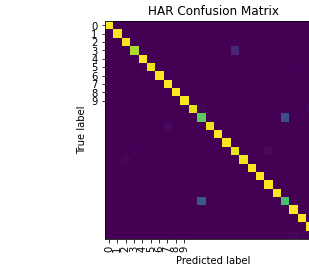

In [23]:
labels_name = ["0","1","2","3","4","5","6","7","8","9"]
plot_confusion_matrix(cm, labels_name, "HAR Confusion Matrix")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()

In [1]:
from sklearn.datasets import fetch_20newsgroups

# categories = ['alt.atheism', 'soc.religion.christian',
#               'comp.graphics', 'sci.med']
# twenty_train = fetch_20newsgroups(subset='train',
#     categories=categories, shuffle=True, random_state=42)
# twenty_test = fetch_20newsgroups(subset='test',
#     categories=categories, shuffle=True, random_state=42)

In [28]:
!pwd

/tmp/03cb9618-b27c-4378-a116-f1d74054fdb0


In [25]:
from enum import Enum
class LabelType(Enum):
    industry = "01"
    scene = "02"
    style = "03"

In [28]:
LabelType.industry.value

'01'